In [10]:
import kagglehub
import seaborn as sns
import matplotlib.pyplot as plt
from kagglehub import KaggleDatasetAdapter

# Download the latest dataset from kaggle
downloaded_path = kagglehub.dataset_download("thedevastator/spotify-tracks-genre-dataset")

# Load the dataset using dataset_load
songs = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "thedevastator/spotify-tracks-genre-dataset",
  "train.csv",
)

songs.head()

Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.
Using Colab cache for faster access to the 'spotify-tracks-genre-dataset' dataset.


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [11]:
songs.info()
print(songs.shape)
songs[songs.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [12]:
# Categorical Bucketing / map
# Handling missing data

# Created new column named "popularity_lvl"
# Popularity is "high" if popularity >= 75
# "med" if 50 <= popularity < 75
# "low" for all other values
songs["popularity_lvl"] = songs.popularity.map(lambda p: "high" if p >= 75 else ("med" if p >= 50 else "low"))

# Drop the row with missing data
# We decided to drop this row because we cannot fill the (artists, album_name, track_name) columns
# with any default value that would make sense
# Dropping a single row will not skew the data in any significant way
songs = songs.dropna()
songs.info()
songs.head()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_lvl
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,med
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,med
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,med
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,med
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,high


In [13]:
# multi column groupby with agg and sorting

# All songs are grouped by (popularity_lvl, explicit) in a muli-column table
# Each key is aggregated by its count in the table and the table is sorted descending by count
songs.groupby(["popularity_lvl", "explicit"]).track_name.agg(["count"]).sort_values(by="count", ascending=False)

count
popularity_lvl explicit       
low            False     78198
med            False     23769
low            True       6434
med            True       2767
high           False      2285
               True        546

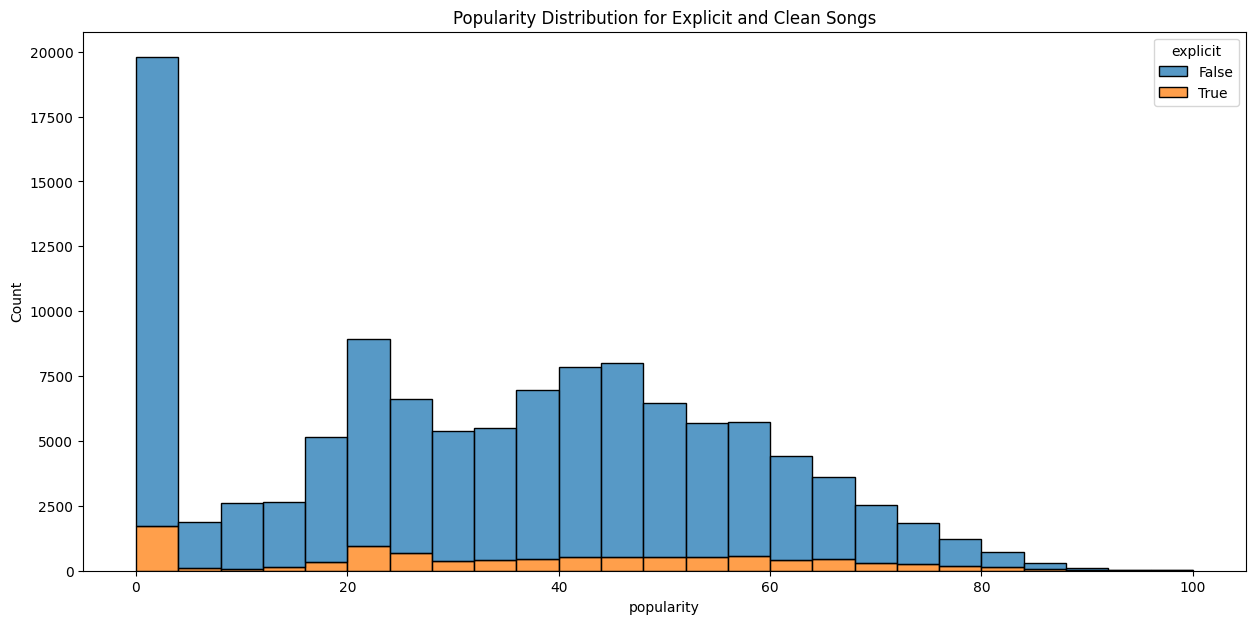

In [14]:
# Histogram showing the popularity distribution for explicit and clean songs
# Both distributions are shown stacked on each other, where blue is clean and orange is explicit
plt.figure(figsize=(15, 7))
sns.histplot(data=songs, x="popularity", hue="explicit", multiple="stack", bins=25)
plt.title("Popularity Distribution for Explicit and Clean Songs")
plt.show()

In [15]:
# groupby agg with mean and sorted values

# Songs are grouped by (explicit) column and each key has its mean popularity calculated and stored
# Mean values are sorted in descending order
popularity_mean = songs.groupby("explicit").popularity.agg(["mean"]).sort_values(by="mean", ascending=False)
popularity_mean

,mean
explicit,
True,36.454191
False,32.938207


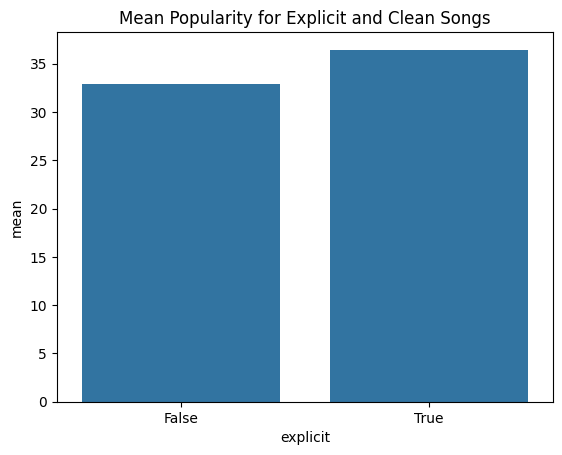

In [16]:
# Bar plot comparing the mean popularity between explict songs and clean songs
sns.barplot(data=popularity_mean, x=popularity_mean.index, y="mean")
plt.title("Mean Popularity for Explicit and Clean Songs")
plt.show()